In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
#Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import math
import matplotlib.dates as mdates
# Usar "Shift+Enter" para procesar la información de la celda

PARTE 1

In [2]:
#El viñedo se encuentra ubicado en el kilómetro 41 de la carretera de Hermosillo a Bahía Kino 
#(Latitud 28º 55.117' N, Longitud 111º 18.638' W, altitud 101m)
#Con los datos meteorológicos que se tienen (puede haber huecos), se pide construir una tabla de promedios
#mensuales similar a la Tabla 1 de Djaman:
#Latitud (º N)
#Longitud (º O)
#Elevación (m)
#Velocidad del Viento (WS_ms_S_WVT en m/s)
#Tmax (Max de  AirTC_Avg en ºC)
#Tmin (Min de  AirTC_Avg en ºC)
#RHmax (Max de RH en %)
#RHmin (Min de RH en %)
#RHmean (Promedio de RH en %)
#Rs (Radiación neta Rn_Avg en MJ/m2/día)
df0 = pd.DataFrame(pd.read_csv("meteo-vid-2018.csv", engine="python"))
df0.head()

,Date,Time,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,H. suelo 60,Result2_Avg,T. suelo 60 cm,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego
0,06/01/2018,17:00:00,12.39,28.43,36.15,7.23,-47.65,-13.43,27.69,300.84,...,0.23,0.04,24.33,75.80,0.04,14.16,13.37,14.46,13.46,0.0
1,06/01/2018,17:30:00,12.27,27.38,22.42,4.48,-56.17,-15.24,26.63,299.78,...,0.23,0.04,21.95,71.54,0.04,14.10,13.23,14.32,13.81,0.0
2,06/01/2018,18:00:00,12.22,26.30,1.41,0.28,-52.09,-15.60,24.90,298.05,...,0.23,0.04,21.34,70.38,0.04,14.31,13.12,14.51,13.84,0.0
3,06/01/2018,18:30:00,12.19,25.04,-2.77,-0.55,-51.42,-14.43,23.31,296.46,...,0.23,0.04,21.12,70.02,0.04,14.38,13.18,14.58,13.94,0.0
4,06/01/2018,19:00:00,12.17,23.92,-2.48,-0.50,-50.24,-13.61,22.48,295.63,...,0.24,0.04,21.10,70.00,0.04,14.41,13.32,14.60,14.11,0.0


In [3]:
#Tipos de datos.
df0.dtypes

Date                 object
Time                 object
batt_volt_Min       float64
logger_temp         float64
short_up_Avg        float64
short_dn_Avg        float64
long_up_Avg         float64
long_dn_Avg         float64
cnr4_T_C_Avg        float64
cnr4_T_K_Avg        float64
long_up_corr_Avg    float64
long_dn_corr_Avg    float64
Rs_net_Avg          float64
Rl_net_Avg          float64
albedo_Avg           object
Rn_Avg              float64
AirTC_Avg           float64
RH                  float64
WS_ms_S_WVT         float64
WindDir_D1_WVT      float64
WindDir_SD1_WVT     float64
Temp_C_Avg(1)       float64
Temp_C_Avg(2)       float64
Temp_C_Avg(3)       float64
Temp_C_Avg(4)        object
H. suelo 60         float64
Result2_Avg         float64
T. suelo 60 cm      float64
Result4_Avg         float64
Result5_Avg         float64
Result6_Avg         float64
Result7_Avg         float64
Result8_Avg         float64
Result9_Avg         float64
Riego               float64
dtype: object

In [4]:
#Creamos la variable FECHAS con las columnas DATE y TIME. 
#Nos deshacemos de esas columnas.
df0["FECHAS"] = df0["Date"] +" "+ df0["Time"]
df0.drop( ["Date","Time"], axis=1, inplace=True )

In [5]:
#Creamos la columna FECHA en base a la columna FECHAS.
#FECHA será tipo datetime.
df0['FECHA'] = pd.to_datetime(df0.apply(lambda x: x['FECHAS'],1),dayfirst=True)
df0 = df0.drop(['FECHAS'],1)
df0.head()

,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,long_up_corr_Avg,long_dn_corr_Avg,...,Result2_Avg,T. suelo 60 cm,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego,FECHA
0,12.39,28.43,36.15,7.23,-47.65,-13.43,27.69,300.84,416.77,451.00,...,0.04,24.33,75.80,0.04,14.16,13.37,14.46,13.46,0.0,2018-01-06 17:00:00
1,12.27,27.38,22.42,4.48,-56.17,-15.24,26.63,299.78,401.77,442.70,...,0.04,21.95,71.54,0.04,14.10,13.23,14.32,13.81,0.0,2018-01-06 17:30:00
2,12.22,26.30,1.41,0.28,-52.09,-15.60,24.90,298.05,395.37,431.87,...,0.04,21.34,70.38,0.04,14.31,13.12,14.51,13.84,0.0,2018-01-06 18:00:00
3,12.19,25.04,-2.77,-0.55,-51.42,-14.43,23.31,296.46,386.56,423.54,...,0.04,21.12,70.02,0.04,14.38,13.18,14.58,13.94,0.0,2018-01-06 18:30:00
4,12.17,23.92,-2.48,-0.50,-50.24,-13.61,22.48,295.63,382.87,419.49,...,0.04,21.10,70.00,0.04,14.41,13.32,14.60,14.11,0.0,2018-01-06 19:00:00


In [6]:
##----------NOTA----------##
#Convertiremos la variable albedo_Avg de object a float64.
#En la parte 2 se requiere usar esta columna.
df0['albedo_Avg'] = df0['albedo_Avg'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [7]:
#Ahora obtenemos el promedio mensual de los parámetros:
#Latitud (º N)
#Longitud (º O)
#Elevación (m)
#Velocidad del Viento (WS_ms_S_WVT en m/s)
#Tmax (Max de  AirTC_Avg en ºC)
#Tmin (Min de  AirTC_Avg en ºC)
#RHmax (Max de RH en %)
#RHmin (Min de RH en %)
#RHmean (Promedio de RH en %)
#Rs (Radiación neta Rn_Avg en MJ/m2/día).

In [8]:
#Filtramos solo los datos a utilizar, incluyendo albedo_Avg.
df0 = df0.filter(['FECHA','WS_ms_S_WVT','AirTC_Avg','RH','Rn_Avg','albedo_Avg'],axis=1)
df0.head()

,FECHA,WS_ms_S_WVT,AirTC_Avg,RH,Rn_Avg,albedo_Avg
0,2018-01-06 17:00:00,2.33,27.75,20.61,1.79,0.00
1,2018-01-06 17:30:00,3.12,26.57,25.25,-18.59,0.00
2,2018-01-06 18:00:00,2.54,25.01,26.45,-35.10,0.00
3,2018-01-06 18:30:00,2.01,23.65,29.22,-40.13,-0.16
4,2018-01-06 19:00:00,2.14,22.84,31.08,-39.46,-0.15


In [9]:
#Creamos la columna de MES y DÍA.
df0['MES'] = df0['FECHA'].dt.month
df0['DÍA'] = df0['FECHA'].dt.day
df0.head()

,FECHA,WS_ms_S_WVT,AirTC_Avg,RH,Rn_Avg,albedo_Avg,MES,DÍA
0,2018-01-06 17:00:00,2.33,27.75,20.61,1.79,0.00,1.0,6.0
1,2018-01-06 17:30:00,3.12,26.57,25.25,-18.59,0.00,1.0,6.0
2,2018-01-06 18:00:00,2.54,25.01,26.45,-35.10,0.00,1.0,6.0
3,2018-01-06 18:30:00,2.01,23.65,29.22,-40.13,-0.16,1.0,6.0
4,2018-01-06 19:00:00,2.14,22.84,31.08,-39.46,-0.15,1.0,6.0


In [10]:
#Crearemos columnas para la máxima y mínima por día para los parámetros de
#RH y AirTC_Avg utilizando un groupby.
df0["RH_max"] = df0.groupby(["MES","DÍA"])["RH"].transform("max")
df0["RH_min"] = df0.groupby(["MES","DÍA"])["RH"].transform("min")
df0["AirTC_Avg_max"] = df0.groupby(["MES","DÍA"])["AirTC_Avg"].transform("max")
df0["AirTC_Avg_min"] = df0.groupby(["MES","DÍA"])["AirTC_Avg"].transform("min")

#Mostramos el nuevo DataFrame con los máximos y mínimos diarios.
df0.head()

,FECHA,WS_ms_S_WVT,AirTC_Avg,RH,Rn_Avg,albedo_Avg,MES,DÍA,RH_max,RH_min,AirTC_Avg_max,AirTC_Avg_min
0,2018-01-06 17:00:00,2.33,27.75,20.61,1.79,0.00,1.0,6.0,46.27,20.61,27.75,16.03
1,2018-01-06 17:30:00,3.12,26.57,25.25,-18.59,0.00,1.0,6.0,46.27,20.61,27.75,16.03
2,2018-01-06 18:00:00,2.54,25.01,26.45,-35.10,0.00,1.0,6.0,46.27,20.61,27.75,16.03
3,2018-01-06 18:30:00,2.01,23.65,29.22,-40.13,-0.16,1.0,6.0,46.27,20.61,27.75,16.03
4,2018-01-06 19:00:00,2.14,22.84,31.08,-39.46,-0.15,1.0,6.0,46.27,20.61,27.75,16.03


In [11]:
#Nuevo DataFrame para los promedios mensuales.
df1 = pd.DataFrame()
df1["V_wind"] = np.round(df0.groupby(["MES"])["WS_ms_S_WVT"].transform("mean"), decimals=2)
df1["Temp_mean"] = np.round(df0.groupby(["MES"])["AirTC_Avg"].transform("mean"), decimals=2)
df1["Temp_max"] = np.round(df0.groupby(["MES"])["AirTC_Avg_max"].transform("mean"), decimals=2)
df1["Temp_min"] = np.round(df0.groupby(["MES"])["AirTC_Avg_min"].transform("mean"), decimals=2)
df1["RH_mean"] = np.round(df0.groupby(["MES"])["RH"].transform("mean"), decimals=2)
df1["RH_max"] = np.round(df0.groupby(["MES"])["RH_max"].transform("mean"), decimals=2)
df1["RH_min"] = np.round(df0.groupby(["MES"])["RH_min"].transform("mean"), decimals=2)
df1["Rad_Sol"] = np.round(df0.groupby(["MES"])["Rn_Avg"].transform("mean"), decimals=2)
df1["Albedo"] = np.round(df0.groupby(["MES"])["albedo_Avg"].transform("mean"), decimals=2)

#Eliminamos los duplicados.
df1 = df1.drop_duplicates(subset=["V_wind","Temp_mean","Temp_max","Temp_min","RH_mean","RH_max","RH_min","Rad_Sol","Albedo"])

#Mostramos el DataFrame de los promedios.
df1.head()

,V_wind,Temp_mean,Temp_max,Temp_min,RH_mean,RH_max,RH_min,Rad_Sol,Albedo
0,1.94,16.96,27.34,7.50,38.47,66.38,14.06,34.73,-0.42
1214,1.96,17.23,25.32,9.43,48.17,72.54,25.73,56.25,-0.48
2558,1.93,19.28,29.52,8.88,36.97,68.36,15.20,92.89,-0.41
4046,2.10,21.88,32.67,10.78,40.79,76.59,15.71,134.01,-0.39
5486,2.11,23.65,34.13,12.78,44.23,79.97,17.23,162.41,-0.37


In [12]:
#Verificamos la parte final.
df1.tail()

,V_wind,Temp_mean,Temp_max,Temp_min,RH_mean,RH_max,RH_min,Rad_Sol,Albedo
11390,1.79,29.66,37.58,23.58,66.62,93.10,36.61,136.75,-0.49
12830,1.66,23.25,31.35,16.58,68.70,94.84,37.13,95.51,-0.61
14318,1.50,16.97,28.00,8.25,58.09,90.25,22.50,60.38,-0.66
15758,1.63,14.33,24.35,5.99,58.33,88.08,25.36,44.96,-0.52
17247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Reiniciamos los índices
df1 = df1.reset_index(drop=True)
df1.head()

,V_wind,Temp_mean,Temp_max,Temp_min,RH_mean,RH_max,RH_min,Rad_Sol,Albedo
0,1.94,16.96,27.34,7.50,38.47,66.38,14.06,34.73,-0.42
1,1.96,17.23,25.32,9.43,48.17,72.54,25.73,56.25,-0.48
2,1.93,19.28,29.52,8.88,36.97,68.36,15.20,92.89,-0.41
3,2.10,21.88,32.67,10.78,40.79,76.59,15.71,134.01,-0.39
4,2.11,23.65,34.13,12.78,44.23,79.97,17.23,162.41,-0.37


In [14]:
#Checamos los últimos renglones.
df1.tail()

,V_wind,Temp_mean,Temp_max,Temp_min,RH_mean,RH_max,RH_min,Rad_Sol,Albedo
8,1.79,29.66,37.58,23.58,66.62,93.10,36.61,136.75,-0.49
9,1.66,23.25,31.35,16.58,68.70,94.84,37.13,95.51,-0.61
10,1.50,16.97,28.00,8.25,58.09,90.25,22.50,60.38,-0.66
11,1.63,14.33,24.35,5.99,58.33,88.08,25.36,44.96,-0.52
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Eliminamos el último renglón.
df1 = df1.drop(df1.index[12]).reset_index(drop=True)
df1

,V_wind,Temp_mean,Temp_max,Temp_min,RH_mean,RH_max,RH_min,Rad_Sol,Albedo
0,1.94,16.96,27.34,7.50,38.47,66.38,14.06,34.73,-0.42
1,1.96,17.23,25.32,9.43,48.17,72.54,25.73,56.25,-0.48
2,1.93,19.28,29.52,8.88,36.97,68.36,15.20,92.89,-0.41
3,2.10,21.88,32.67,10.78,40.79,76.59,15.71,134.01,-0.39
4,2.11,23.65,34.13,12.78,44.23,79.97,17.23,162.41,-0.37
5,2.15,28.42,36.97,19.55,50.81,81.38,25.80,163.93,-0.38
6,2.02,31.07,38.42,24.49,57.64,85.18,32.81,157.53,-0.19
7,1.91,30.12,36.99,24.70,68.87,92.54,42.21,151.27,-0.38
8,1.79,29.66,37.58,23.58,66.62,93.10,36.61,136.75,-0.49
9,1.66,23.25,31.35,16.58,68.70,94.84,37.13,95.51,-0.61


In [16]:
#Cambiamos los índices por meses.
meses = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
df1['MES'] = meses
df1.set_index('MES')

,V_wind,Temp_mean,Temp_max,Temp_min,RH_mean,RH_max,RH_min,Rad_Sol,Albedo
MES,,,,,,,,,
Enero,1.94,16.96,27.34,7.50,38.47,66.38,14.06,34.73,-0.42
Febrero,1.96,17.23,25.32,9.43,48.17,72.54,25.73,56.25,-0.48
Marzo,1.93,19.28,29.52,8.88,36.97,68.36,15.20,92.89,-0.41
Abril,2.10,21.88,32.67,10.78,40.79,76.59,15.71,134.01,-0.39
Mayo,2.11,23.65,34.13,12.78,44.23,79.97,17.23,162.41,-0.37
Junio,2.15,28.42,36.97,19.55,50.81,81.38,25.80,163.93,-0.38
Julio,2.02,31.07,38.42,24.49,57.64,85.18,32.81,157.53,-0.19
Agosto,1.91,30.12,36.99,24.70,68.87,92.54,42.21,151.27,-0.38
Septiembre,1.79,29.66,37.58,23.58,66.62,93.10,36.61,136.75,-0.49


In [17]:
#Verificamos los tipos de datos.
df1.dtypes

V_wind       float64
Temp_mean    float64
Temp_max     float64
Temp_min     float64
RH_mean      float64
RH_max       float64
RH_min       float64
Rad_Sol      float64
Albedo       float64
MES           object
dtype: object

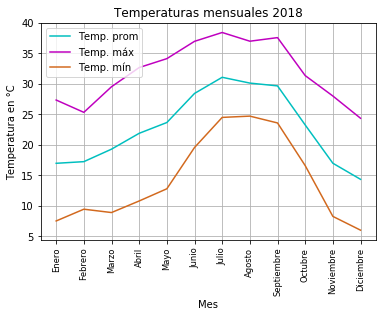

In [18]:
#Graficamos las temperaturas.
X = meses
N = np.arange(12)
Y = df1["Temp_mean"]
Z = df1["Temp_max"]
W = df1["Temp_min"]

plt.plot(Y, label='Temp. prom', color='c')
plt.plot(Z, label='Temp. máx', color='m')
plt.plot(W, label='Temp. mín', color='#D2691E')

plt.xticks(N, X, size='small', rotation=90, color='k')
plt.xlabel("Mes")
plt.ylabel("Temperatura en °C")
plt.grid()
plt.legend(loc='best')
plt.title('Temperaturas mensuales 2018')
plt.savefig('TempMeses', plt=2000)
plt.show()

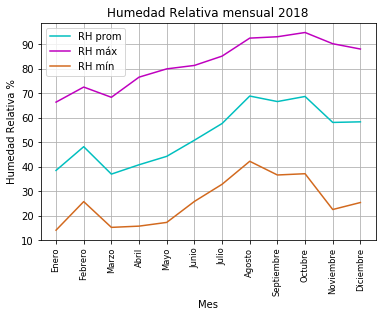

In [19]:
#Graficamos las humedades relativas.
X = meses
N = np.arange(12)
Y = df1["RH_mean"]
Z = df1["RH_max"]
W = df1["RH_min"]

plt.plot(Y, label='RH prom', color='c')
plt.plot(Z, label='RH máx', color='m')
plt.plot(W, label='RH mín', color='#D2691E')

plt.xticks(N, X, size='small', rotation=90, color='k')
plt.xlabel("Mes")
plt.ylabel("Humedad Relativa %")
plt.grid()
plt.legend(loc='best')
plt.title('Humedad Relativa mensual 2018')
plt.savefig('RHMeses', plt=2000)
plt.show()

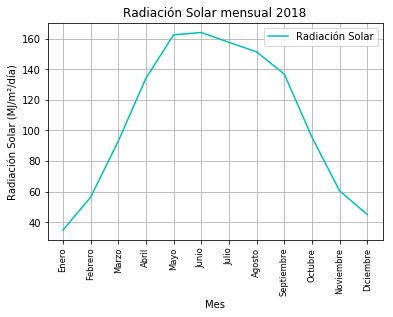

In [20]:
#Graficamos las temperaturas.
X = meses
N = np.arange(12)
Y = df1['Rad_Sol']

plt.plot(Y, label='Radiación Solar', color='c')

plt.xticks(N, X, size='small', rotation=90, color='k')
plt.xlabel("Mes")
plt.ylabel("Radiación Solar (MJ/m²/día)")
plt.grid()
plt.legend(loc='best')
plt.title('Radiación Solar mensual 2018')
plt.savefig('RadSolMeses', plt=2000)
plt.show()

PARTE 2
Con esa tabla de valores procederemos a estimar la Evapotranspiración ET0 mensual promedio, utilizando las ecuaciones de los siguientes 3 autores que aparecen en el artículo de K. Djaman: 

    Ec 7, Jansen & Haise (1963)
    ET0 = (0.0252Tmean + 0.078)Rs
    
    Ec. 31, Valiantzas 1 (2012):  𝜑 es la latitud en radianes
    ET0 = 0.0393 Rs (Tmean + 9.5)^0.5 - 0.19(Rs^0.6)(φ^0.15) + 0.0061(Tmean + 20)(1.11Tmean - Tmin - 2)^0.7
    𝜑 es la latitud en radianes.

    Ec. 34,  Valiantzas 4 (2013): 
    ET0 = 0.051(1 - α)Rs(Tmean + 9.5)^0.5 - 2.4(Rs/Ra)^2 + 0.048(Tmean + 20)(1 - RH/100)(0.5 + 0.536u2) + 0.00012z
    α es el albedo (Albedo_Avg)
    Ra es la radiación solar en la parte alta de la atmósfera 
        Ra = 24(60)/π (Gsc)(dr)(ωsinφsinδ + cosφcosδsinω)
        Gsc es la constante solar (Gsc=0.0820 MJm^-2min^-1)
        dr = distancia relativa entre la Tierra y el Sol
        ω = ángulo de la hora donde se oculta el sol
        φ = latitud (rad)
        δ = declinación solar (rad)
    u2 es la velocidad del viento a 2 m de altura (WS_ms_S_WVT)
    z es la altura sobre el nivel mar. 


In [21]:
#-------- ECUACIÓN 7 ---------#

#Se guardarán los valores para cada mes en un arreglo ET0_7
ET0_7 = []
for i in range (0, len(df1)):
    ET0_7.append((0.0252*df1['Temp_mean'][i] + 0.078)*df1['Rad_Sol'][i])

In [22]:
#-------- ECUACIÓN 31 --------#

#La latitud en radianes siempre será la misma.
φ = (math.pi/180)*28.94917
#Se guardarán los valores para cada mes en el arreglo ET0_31
ET0_31 = []
for i in range(0, len(df1)):
    ET0_31.append(0.0393*df1['Rad_Sol'][i]*(df1['Temp_mean'][i] + 9.5)**0.5 - 0.19*(df1['Rad_Sol'][i]**0.6)*(φ**0.15) + 0.0061*(df1['Temp_mean'][i] + 20)*(1.12*df1['Temp_mean'][i] - df1['Temp_min'][i] - 2)**0.7)

In [23]:
#-------- ECUACIÓN 34 --------#

#Para esta ecuación, obtenemos primero Ra.
#Utilizaremos tres arreglos.
dr = []
δ = []
ω = []

for n in range (0, len(df1)):
    α = df1['Albedo'][i]
    m = int(30.4*n - 15) 
    dr.append(1 + 0.033*math.cos(((2*math.pi)/365)*m))
    δ.append(0.409*math.sin(((2*math.pi)/365)*m - 1.39))
    ω.append(math.acos(-math.tan(φ)*math.tan(0.409*math.sin(((2*math.pi)/365)*m - 1.39))))

In [24]:
#Creamos un DataFrame auxiliar con los arreglos anteriores.
df_p = pd.DataFrame()
df_p['dr'] = dr
df_p['δ'] = δ
df_p['ω'] = ω
df_p = df_p.apply(pd.to_numeric, errors='coerce')

#Mostramos el DataFrame temporal.
df_p

,dr,δ,ω
0,1.031906,-0.407775,1.329507
1,1.031906,-0.370216,1.354428
2,1.023584,-0.236097,1.437322
3,1.008564,-0.033386,1.552321
4,0.991711,0.172248,1.667178
5,0.976615,0.336995,1.765832
6,0.968168,0.407488,1.811891
7,0.968023,0.371698,1.788131
8,0.976615,0.233213,1.702570
9,0.991162,0.036894,1.591215


In [25]:
#Y ahora calculamos el Ra por cada mes:
#Creamo el arreglo Ra.
Ra = []

#Recorremos todos los meses
for i in range(0, len(df1)):
    Ra.append(((24*60)/math.pi)*0.0820*(df_p['ω'][i]*math.sin(φ)*math.sin(df_p['δ'][i]) + math.cos(φ)*math.cos(df_p['δ'][i])*math.sin(df_p['ω'][i])))

In [26]:
#Para la realización de cálculos, convertimos el arreglo en float64.
df_p['Ra'] = Ra
df_p['Ra'] = df_p['Ra'].apply(lambda col:pd.to_numeric(col,errors='coerce'))

In [27]:
#Y calculamos la ecuación 34 por cada mes en un arreglo ET0_34.
ET0_34 = []

#Recorremos todos los meses:
for i in range(0, len(df1)):
    ET0_34.append(0.051*(1 - df1['Albedo'][i])*df1['Rad_Sol'][i]*(df1['Temp_mean'][i] + 9.5)**0.5 - 2.4*(df1['Rad_Sol'][i]/df_p['Ra'][i])**2 + 0.048*(df1['Temp_mean'][i] + 20)*(1 - df1['RH_mean'][i]/100)*(0.5 + 0.536*df1['V_wind'][i]) + 0.00012*101)

In [28]:
#Creamos un nuevo DataFrame para las ecuaciones.
ET0 = {'ET0_7': ET0_7, 'ET0_31': ET0_31, 'ET0_34':ET0_34,'MES':meses}
ET0 = pd.DataFrame(data=ET0)
ET0.set_index('MES')

,ET0_7,ET0_31,ET0_34
MES,,,
Enero,17.552264,6.669480,7.191386
Febrero,28.811025,10.466810,6.230459
Marzo,52.376584,18.243966,6.013087
Abril,84.342678,27.693491,12.869848
Mayo,109.461092,34.603153,22.118557
Junio,130.190583,37.524763,34.717773
Julio,135.627659,37.233995,29.401364
Agosto,126.616620,35.133306,36.641583
Septiembre,112.877826,31.608780,36.512239


PARTE 3

In [29]:
#Utilizaremos el archivo de datos de flujo.
df2 = pd.DataFrame(pd.read_csv("flujos-vid-2018.csv",engine="python"))
df2.head()

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,Tsoil_fmeth,Tsoil_fwin,PotRad,FP_NEEnight,FP_Temp,E_0,R_ref,Reco,GPP_f,GPP_fqc
0,--,--,--,umolm-2s-1,Wm-2,Wm-2,Wm-2,degC,degC,%,...,-,days,W_m-2,umolm-2s-1,degC,degK,umolm-2s-1,umolm-2s-1,umolm-2s-1,-
1,2018,7,0.5,2.56,11.52,-20.04,-0.87,16.51,20.99,43.83,...,-9999,-9999,0,-9999,16.51,207.66,0.92767,1.00713,-1.0729,1
2,2018,7,1,4.07,15.11,-7.34,-0.97,16.61,21.05,46.82,...,-9999,-9999,0,-9999,16.61,207.66,0.92767,1.01249,-9.62E-01,1
3,2018,7,1.5,0.92,8.61,-9.76,-0.96,16.07,21.09,46.65,...,-9999,-9999,0,-9999,16.07,207.66,0.92767,0.98371,-1.1643,1
4,2018,7,2,0.41,1.93,-8.55,-2.06,16.06,21.09,46.27,...,-9999,-9999,0,-9999,16.06,207.66,0.92767,0.98318,-1.1648,1


In [30]:
#Filtraremos solo las columnas de interés.
df2 = df2.filter(['Year','DoY','Hour','Rg_f','LE_f','H_f'], axis=1)
df2.head()

,Year,DoY,Hour,Rg_f,LE_f,H_f
0,--,--,--,Wm-2,Wm-2,Wm-2
1,2018,7,0.5,-0.87,11.52,-20.04
2,2018,7,1,-0.97,15.11,-7.34
3,2018,7,1.5,-0.96,8.61,-9.76
4,2018,7,2,-2.06,1.93,-8.55


In [31]:
#Eliminamos el primer renglón y reseteamos los índices.
df2 = df2.drop(df2.index[0]).reset_index(drop=True)
df2.head()

,Year,DoY,Hour,Rg_f,LE_f,H_f
0,2018,7,0.5,-0.87,11.52,-20.04
1,2018,7,1,-0.97,15.11,-7.34
2,2018,7,1.5,-0.96,8.61,-9.76
3,2018,7,2,-2.06,1.93,-8.55
4,2018,7,2.5,-1.32,6.40,-0.55


In [32]:
#Se requiere crear una columna de Fechas.
#Convertimos a string la columna de Horas.
#Para checar la extensión.
df2['Hour'] = df2['Hour'].astype(str)
df2.dtypes

Year    object
DoY     object
Hour    object
Rg_f    object
LE_f    object
H_f     object
dtype: object

In [33]:
#Hacemos el arreglo de Horas y minutos.
Hora = []
Minuto = []

#Recorremos todo el DataFrame df2.
#Aplicaremos condiciones para la hora.
for i in range(0, len(df2)):
    #Si contiene 1 caracter.
    if (len(str(df2['Hour'][i]))==1):
        Hora.append(str(df2['Hour'][i])[0:1])
        Minuto.append('00')
    #Si contiene 2 caracteres.
    if (len(str(df2['Hour'][i]))==2):
        #Si la hora es 24:00
        if(str(df2['Hour'][i])[0:2]=='24'):
            Hora.append('00')
            Minuto.append('00')
        #Si es otra hora distinta de 24:00
        else:
            Hora.append(str(df2['Hour'][i])[0:2])
            Minuto.append('00')
    #Si contiene 3 caracteres.
    elif(len(str(df2['Hour'][i]))==3):
            Hora.append(str(df2['Hour'][i])[0:1])
            Minuto.append('30')
    #Si contiene 3 caracteres.
    elif(len(str(df2['Hour'][i]))==4):
            Hora.append(str(df2['Hour'][i])[0:2])
            Minuto.append('30')

In [34]:
#Creamos un arreglo para los días.
Days = [df2['DoY'][i] for i in range(0,len(df2))]

In [35]:
#Creamos un DataFrame con días, horas y minutos.
dat = {'DÍA': Days, 'HORA': Hora, 'MINUTO': Minuto}
df_dates = pd.DataFrame(data=dat)
df_dates.head()

,DÍA,HORA,MINUTO
0,7,0,30
1,7,1,00
2,7,1,30
3,7,2,00
4,7,2,30


In [36]:
#Convertimos la columna DÍA a flotante.
df_dates['DÍA'] = df_dates['DÍA'].apply(lambda col:pd.to_numeric(col,errors='coerce'))
#Checamos los tipos de variables.
df_dates.dtypes

DÍA        int64
HORA      object
MINUTO    object
dtype: object

In [37]:
#Aumentamos un día cuando tengamos la hora 00:00
#Creamos un arreglo temporal de días.
day =[]

#Recorremos todo el DataFrame df2.
for i in range(0,len(df2)):
    #Sumar un día si es 00:00
    if(df_dates['HORA'][i]=='00' and df_dates['MINUTO'][i]=='00'):
        day.append(df_dates['DÍA'][i] + 1)
    else:
        day.append(df_dates['DÍA'][i])

#Agregamos ese arreglo en el DataFrame.
df_dates['DÍA'] = day
df_dates.head()

,DÍA,HORA,MINUTO
0,7,0,30
1,7,1,00
2,7,1,30
3,7,2,00
4,7,2,30


In [38]:
#Ahora creamos una variable string con el año, día, hora y minuto.
#Creamos un arrgelo de fechas.
fechas = []

#Recorremos todo el DataFrame df2.
for i in range(0,len(df2)):
    fechas.append('2018 ' +str(df_dates['DÍA'][i]) + ' ' + df_dates['HORA'][i] + ' ' + df_dates['MINUTO'][i])

In [39]:
#Convertimos los elementos de fechas a variables datetime.
#Creamos un arreglo temporal FECHA.
FECHAS = []

#Recorremos todo el DataFrame df2.
for i in range(0,len(df2)):
    d = datetime.datetime.strptime(fechas[i],'%Y %j %H %M')
    D = d.isoformat(' ')
    FECHAS.append(D)

In [40]:
#Antes que nada, convertimos a flotantes las columnas de df2.
df2 = df2.apply(pd.to_numeric,errors='coerce')
df2.dtypes

Year      int64
DoY       int64
Hour    float64
Rg_f    float64
LE_f    float64
H_f     float64
dtype: object

In [41]:
#Agregamos la columna FECHAS al DataFrame df2.
df2['FECHAS'] = FECHAS
#Mostramos los últimos renglones.
df2.tail()

,Year,DoY,Hour,Rg_f,LE_f,H_f,FECHAS
17227,2018,365,22.0,-1.93,2.79,-0.75,2018-12-31 22:00:00
17228,2018,365,22.5,-2.00,0.63,-3.72,2018-12-31 22:30:00
17229,2018,365,23.0,-2.11,1.06,-3.49,2018-12-31 23:00:00
17230,2018,365,23.5,-1.92,-0.46,-9.24,2018-12-31 23:30:00
17231,2018,365,24.0,-2.64,-2.29,27.24,2019-01-01 00:00:00


In [42]:
#Conevrtimos FECHAS a variable datetime.
df2['FECHA'] = pd.to_datetime(df2.apply(lambda x: x['FECHAS'],1), dayfirst=True)
#Eliminamos las columnas de FECHAS, día, año y hora.
df2 = df2.drop(['FECHAS','Year','DoY','Hour'],1)

In [43]:
#Checamos los tipos de variables.
df2.dtypes

Rg_f            float64
LE_f            float64
H_f             float64
FECHA    datetime64[ns]
dtype: object

In [44]:
#Ahora creamos columnas de día, mes y hora a partir de FECHA.
df2['MES'] = df2['FECHA'].dt.month
df2['DÍA'] = df2['FECHA'].dt.day
df2['HORA'] = df2['FECHA'].dt.hour

#Y checamos los tipos de variables.
df2.dtypes

Rg_f            float64
LE_f            float64
H_f             float64
FECHA    datetime64[ns]
MES               int64
DÍA               int64
HORA              int64
dtype: object

In [45]:
#Usando un groupby, calculamos la media de los parámetros deseados.
df2["Rg_f_mean"] = df2.groupby(["MES","DÍA","HORA"])["Rg_f"].transform("mean")
df2["LE_f_mean"] = df2.groupby(["MES","DÍA","HORA"])["LE_f"].transform("mean")
df2["H_f_mean"] = df2.groupby(["MES","DÍA","HORA"])["H_f"].transform("mean")

#Eliminamos los renglones repetidos.
df2 = df2.drop_duplicates(subset=["Rg_f_mean",'LE_f_mean','H_f_mean'])
df2.head()

,Rg_f,LE_f,H_f,FECHA,MES,DÍA,HORA,Rg_f_mean,LE_f_mean,H_f_mean
0,-0.87,11.52,-20.04,2018-01-07 00:30:00,1,7,0,-0.870,11.520,-20.040
1,-0.97,15.11,-7.34,2018-01-07 01:00:00,1,7,1,-0.965,11.860,-8.550
3,-2.06,1.93,-8.55,2018-01-07 02:00:00,1,7,2,-1.690,4.165,-4.550
5,-1.22,2.44,-2.92,2018-01-07 03:00:00,1,7,3,-1.180,2.420,-2.765
7,-1.74,2.49,-1.29,2018-01-07 04:00:00,1,7,4,-1.490,4.145,-4.680


In [46]:
#Nos concentraremos en el mes de Marzo.
#Reducimos el DataFrame df2.
df3 = df2[df2['MES'] == 3]
#Reseteamos los índices.
df3 = df3.reset_index(drop=True)
#Mostramos los últimos renglones.
df3.tail()

,Rg_f,LE_f,H_f,FECHA,MES,DÍA,HORA,Rg_f_mean,LE_f_mean,H_f_mean
739,-1.67,6.04,-10.77,2018-03-31 19:00:00,3,31,19,-3.005,7.450,-9.870
740,-4.27,-2.30,6.26,2018-03-31 20:00:00,3,31,20,-4.320,-3.655,-5.660
741,-2.86,-1.67,0.10,2018-03-31 21:00:00,3,31,21,-2.980,-5.030,8.120
742,-2.83,0.01,-0.59,2018-03-31 22:00:00,3,31,22,-2.315,0.710,-1.825
743,-1.74,0.20,2.28,2018-03-31 23:00:00,3,31,23,-1.980,-1.290,1.370


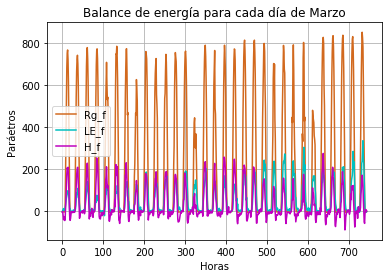

In [47]:
#Gráfica de balance de energía para cada día de Marzo.
X = df3['Rg_f_mean']
Y = df3['LE_f_mean']
Z = df3['H_f_mean']

plt.plot(X, label = "Rg_f", color='#D2691E')
plt.plot(Y, label = "LE_f", color='c')
plt.plot(Z, label = "H_f", color='m')
plt.xlabel("Horas")
plt.ylabel("Paráetros")
plt.legend(loc='best')
plt.grid()
plt.title("Balance de energía para cada día de Marzo")
plt.savefig("BalanceMarzo", plt=2000)
plt.show()

In [48]:
#Gráfica del balance energía promedio en un mes típico (promedio por hora en Marzo)
#Creamos un DataFrame con datos de df3.
df4 = pd.DataFrame()
df4['HORA'] = df3['HORA']
df4['FECHA'] = df3['FECHA']

#Usando un groupby, calculamos el promedio por hora de cada parámetro.
df4['Rg_f_mean'] = df3.groupby(["HORA"])["Rg_f_mean"].transform("mean")
df4['LE_f_mean'] = df3.groupby(["HORA"])["LE_f_mean"].transform("mean")
df4['H_f_mean'] = df3.groupby(["HORA"])["H_f_mean"].transform("mean")

#Eliminamos renglones repetidos.
df4 = df4.drop_duplicates(subset=["Rg_f_mean",'LE_f_mean','H_f_mean'])

#Mostramos el DataFrame.
df4.head()

,HORA,FECHA,Rg_f_mean,LE_f_mean,H_f_mean
0,0,2018-03-01 00:00:00,-2.464839,1.634677,-6.484839
1,1,2018-03-01 01:00:00,-2.242419,2.299839,-6.270806
2,2,2018-03-01 02:00:00,-2.022581,2.365323,-5.884032
3,3,2018-03-01 03:00:00,-2.007903,2.056290,-4.909677
4,4,2018-03-01 04:00:00,-1.948226,2.012258,-4.858387


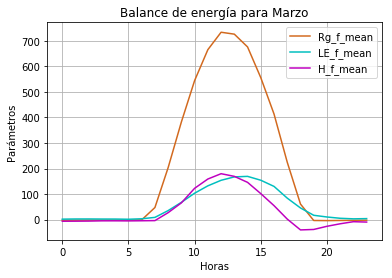

In [49]:
#Gráfica del balance energía promedio de Marzo.
HORAS = [i for i in range(0,24)]
X = HORAS
N = np.arange(24)
Y = df4['Rg_f_mean']
Z = df4['LE_f_mean']
W = df4['H_f_mean']

plt.plot(X, Y, label="Rg_f_mean", color='#D2691E')
plt.plot(Z, label="LE_f_mean", color='c')
plt.plot(W, label="H_f_mean", color='m')
plt.xlabel("Horas")
plt.ylabel("Parámetros")
plt.legend(loc='best')
plt.grid()
plt.title("Balance de energía para Marzo")
plt.savefig("BalanceMarzoMes", plt=2000)
plt.show()